# Slonczewski STT Extension

Example taken from the Mumax3 paper

Vansteenkiste, Arne, et al. "The design and verification of MuMax3." AIP advances 4.10 (2014).


The team compared the results of Mumax3 with the results from oommf of a 160nm x 80nm x 5nm permalloy film. Non-zero epislon prime is used.

Implemented by Jed Cheng (jed.cheng@mag.ed.kyushu-u.ac.jp)

## Run Demo:

In [1]:
from magnumnp import *
import torch
import numpy as np

Timer.enable()

# initialize state
n = (64, 32, 1)
dx = (2.5e-9, 2.5e-9, 5e-9)
L = (n[0]*dx[0], n[1]*dx[1], n[2]*dx[2])
mesh = Mesh(n, dx)

state = State(mesh)
state.material = {
    "Ms": 8e5,
    "A": 1.3e-11,
    "alpha": 0.01,
    "P": 0.5669,
    "Lambda": 2,
    "epsilon_prime": 1,
    "mp": state.Tensor((np.cos(np.radians(20)), np.sin(np.radians(20)), 0)),
    "d": L[2],
    "J": -4e11,
    }
state.m = state.Constant([1,0,0])

# initialize field terms
demag    = DemagField()
exchange = ExchangeField()
torque   = SpinTorqueSlonczewski()

# perform integration with spin torque
llg = LLGSolver([demag, exchange, torque])
logger = Logger("data1", ['t', 'm'], ["m"], fields_every = 10)
while state.t < 0.5e-9:
    llg.step(state, 5e-12)
    logger << state

Timer.print_report()


2024-02-13 13:14:05  magnum.np:WARNING module 'torch' has no attribute 'compile'
2024-02-13 13:14:05  magnum.np:INFO magnum.np 1.1.4
/home/florian/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0
2024-02-13 13:14:05  magnum.np:INFO [State] running on device: cpu (dtype = float64)
2024-02-13 13:14:05  magnum.np:INFO [Mesh] 64x32x1 (size= 2.5e-09 x 2.5e-09 x 5e-09)
2024-02-13 13:14:05  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)
2024-02-13 13:14:05  magnum.np:INFO [DEMAG]: Time calculation of dema

2024-02-13 13:14:26  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.35e-10
2024-02-13 13:14:26  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.4e-10
2024-02-13 13:14:26  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.45e-10
2024-02-13 13:14:27  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.5e-10
2024-02-13 13:14:27  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.55e-10
2024-02-13 13:14:27  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.6e-10
2024-02-13 13:14:27  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.65e-10
2024-02-13 13:14:28  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.7e-10
2024-02-13 13:14:28  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.75e-10
2024-02-13 13:14:28  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.8e-10
2024-02-13 13:14:28  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.85e-10
2024-02-13 13:14:29  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.9e-10
2024-02-13 13:14:29  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.95e-10
2024-02-13 13:14:29  magnum.np:INFO [LLG] step: dt= 5e-12  t=5e-10
2024-02-13 13:14:29  magnum.n


TIMER REPORT
Operation                      No of calls    Avg time [ms]    Total time [s]
---------------------------  -------------  ---------------  ----------------
LLGSolver.step                         101       240.581            24.2986
    DemagField.h                      8472         1.11052           9.40833
    ExchangeField.h                   8472         0.610084          5.16863
    SpinTorqueSlonczewski.h           8472         0.526163          4.45766
---------------------------  -------------  ---------------  ----------------
Total                                                               24.4001
Missing                                                              0.101428



## Plot Results:

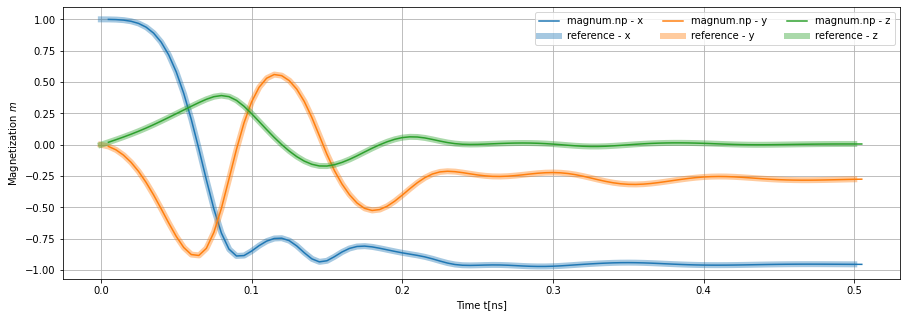

In [2]:
import numpy as np
import matplotlib.pyplot as plt
    
data = np.loadtxt("data1/log.dat")
ref = np.load("ref/M_mx3_1.npy")
#ref = np.load("ref/M_oommf_1.npy") # OOMMF and mumax3 perfectly agree

fig, ax = plt.subplots(figsize=(15, 5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(data[:,0]*1e9, data[:,1], '-', color = cycle[0], label = "magnum.np - x")
ax.plot(ref[0]*1e9, ref[1], '-', color = cycle[0], linewidth = 6, alpha = 0.4, label = "reference - x")

ax.plot(data[:,0]*1e9, data[:,2], '-', color = cycle[1], label = "magnum.np - y")
ax.plot(ref[0]*1e9, ref[2], '-', color = cycle[1], linewidth = 6, alpha = 0.4, label = "reference - y")

ax.plot(data[:,0]*1e9, data[:,3], '-', color = cycle[2], label = "magnum.np - z")
ax.plot(ref[0]*1e9, ref[3], '-', color = cycle[2], linewidth = 6, alpha = 0.4, label = "reference - z")
    
ax.set_xlabel("Time t[ns]")
ax.set_ylabel("Magnetization $m$")
ax.legend(ncol=3)
ax.grid()
fig.savefig("data1/results.png")